In [ ]:
import gensim
import nltk
from nltk.corpus import brown

In [ ]:
nltk.download("brown")

# Load the brown corpus and tokenize the text
sentences = brown.sents()


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Načteme [Brown corpus](https://en.wikipedia.org/wiki/Brown_Corpus) z knihovny [ntlk](https://www.nltk.org/)

In [ ]:
train_set = brown.sents()
model = gensim.models.Word2Vec(train_set)

Model pro jistotu uložíme


In [ ]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

Zjistíme dimenzi vektoru pro embedding

In [ ]:
len(new_model.wv["school"])

100

Zde můžeme velice rychle zjistit nejpodobnější slova

In [ ]:
new_model.wv.most_similar(positive=['school'], topn = 3)

[('college', 0.8934749364852905),
 ('special', 0.8662377595901489),
 ('service', 0.8565620183944702)]

In [ ]:
import numpy as np
labels = []
count = 0
max_count = 1000
X = np.zeros(shape=(max_count,len(new_model.wv["school"])))

In [ ]:
for term in new_model.wv.index_to_key:
  X[count] = new_model.wv[term]
  labels.append(term)
  count+= 1
  if count >= max_count: break

Použijeme PCA na první redukci

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

A následně MDS na redukci to dvou dimenzí k vykreslení

In [ ]:
from sklearn.manifold import MDS
model_mds = MDS(n_components=2, metric=True, random_state = 2)
Y = model_mds.fit_transform(X_50)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


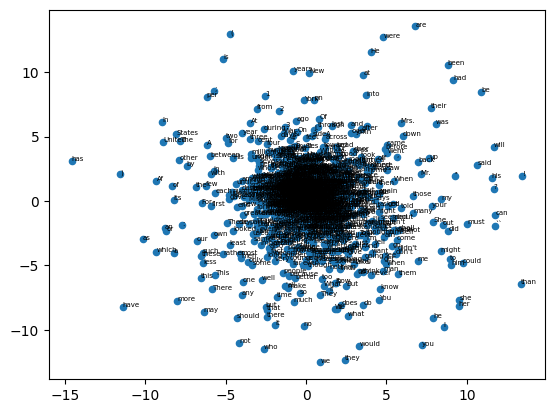

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
  plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = "offset points", size = 5)

plt.show()

Vidíme teda, že tu máme shluk všech slov s nějakým syntaktickým významem a okolo toho máme "kružnici" výrazů, které sami o sobě nemají příliš velký význam.

In [ ]:
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, perplexity = 30, n_iter = 500, random_state = 2, metric = "hamming")
Y = model_tsne.fit_transform(X_50)

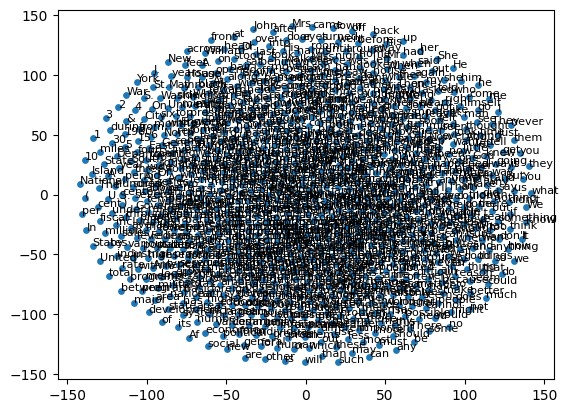

In [ ]:
plt.scatter(Y[:,0], Y[:,1], 15)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
  plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = "offset points", size = 8)

plt.show()

Za použití TSNE s hammingovo vzdáleností dostáváme tento prapodivný útvar.


In [ ]:
pca = PCA(n_components=100)
X_100 = pca.fit_transform(X)

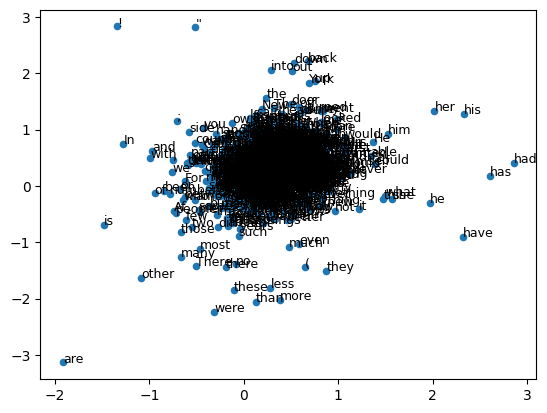

In [ ]:
plt.scatter(X[:,0], X[:,1], 20)

# Add labels
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
  plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = "offset points", size = 9)

plt.show()

Pro přímočarou PCA dostáváme tento útvar.